# Exploratory Data Analysis
- In this notebook, I will conduct an EDA on the data scraped from yelp.
- **Handling missing data Part 2:**
    - Part 1 is done within data_clean.py file
    - In the price section, there are alot (184 records) of values listed as 0, which indicates no price value has been recorded for that restaurant
    - In order to account for this missing data, the price will be determined by the average price of restaurants in the given neighbourhood
- **The EDA includes:**
    - Distribution plots of Rating, Price and # of Reviews
    - The number of cuisines by type of cuisine in the dataset
    - The number of neighbourhoods in the dataset
    - Cuisine Vs. Price (pivot table and plots)
    - Neighbourhood Vs. Price (pivot table and plots)
    - Cuisine Vs. Reviews (pivot table and plots)
    - Neighbourhood Vs. Reviews (pivot table and plots)
    - Number of Cuisines in Respective Neighbourhoods (pivot table and plots)
    - Heatmap Correlations

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('yelp_foods_cleaned.csv')
df.head()

,Rest_name,Rest_ratings,Rest_noreviews,Rest_price,Rest_cuisine,Rest_add,Rest_tel,Rest_nbh,Rating,Price,Cuisine,Street_add,neighbourhood_,neighbourhood,neighbourhood_good
0,Panera Bread,3 star rating,82,$$,American (Traditional),3987 Highway 7,+1-905-479-5888,Unionville,3.0,2,American,Highway 7,NaN,Unionville,Unionville
1,Pai Northern Thai Kitchen,4.5 star rating,2862,$$,Thai,18 Duncan Street,(416) 901-4724,Entertainment District,4.5,2,Asian,Duncan Street,NaN,Entertainment District,Entertainment District
2,Beefing with 7,4.5 star rating,17,None,Hong Kong Style Cafe,4907 Yonge St,4907 Yonge St,Willowdale,4.5,0,Asian,Yonge St,NaN,Willowdale,Willowdale
3,Mira,4.5 star rating,218,$$,Peruvian,420A Wellington Street W,(647) 951-3331,NaN,4.5,2,European,Wellington Street W,Entertainment District,1,Entertainment District
4,Richmond Station,4.5 star rating,764,$$$,Canadian (New),1 Richmond Street W,(647) 748-1444,Downtown Core,4.5,3,American,Richmond Street W,NaN,Downtown Core,Downtown Core


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rest_name           1023 non-null   object 
 1   Rest_ratings        1023 non-null   object 
 2   Rest_noreviews      1023 non-null   int64  
 3   Rest_price          1023 non-null   object 
 4   Rest_cuisine        1023 non-null   object 
 5   Rest_add            1023 non-null   object 
 6   Rest_tel            1023 non-null   object 
 7   Rest_nbh            834 non-null    object 
 8   Rating              1023 non-null   float64
 9   Price               1023 non-null   int64  
 10  Cuisine             1023 non-null   object 
 11  Street_add          1008 non-null   object 
 12  neighbourhood_      147 non-null    object 
 13  neighbourhood       1023 non-null   object 
 14  neighbourhood_good  925 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 120.0

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rest_noreviews,1023.0,145.513196,196.960851,1.0,33.0,82.0,184.0,2862.0
Rating,1023.0,3.993646,0.451903,2.5,4.0,4.0,4.5,5.0
Price,1023.0,1.669599,1.010863,0.0,1.0,2.0,2.0,4.0


In [11]:
# Choosing Relevant columns
df1 = df[['Rest_name','Rest_noreviews','Rating','Price','Cuisine','neighbourhood_good']]

In [12]:
# Dropped the remaining NaN values
df1.dropna(inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# Naming the columns to the dataframe
df1.columns = ['Name','# of Reviews','Rating','Price','Cuisine','Neighbourhood']

In [14]:
df1.head()

,Name,# of Reviews,Rating,Price,Cuisine,Neighbourhood
0,Panera Bread,82,3.0,2,American,Unionville
1,Pai Northern Thai Kitchen,2862,4.5,2,Asian,Entertainment District
2,Beefing with 7,17,4.5,0,Asian,Willowdale
3,Mira,218,4.5,2,European,Entertainment District
4,Richmond Station,764,4.5,3,American,Downtown Core


# Handling Missing Data Part 2

In [15]:
# Restaurants listed as price of 0
df2 = df1[df1['Price']==0]
df2.head()

,Name,# of Reviews,Rating,Price,Cuisine,Neighbourhood
2,Beefing with 7,17,4.5,0,Asian,Willowdale
10,Uncle Ray’s Food & Liquor,13,5.0,0,American,St. Lawrence
20,Boukan,3,4.5,0,American,Upper Beach
41,Boonsik,5,4.0,0,Asian,Bickford Park
70,Islas Filipino BBQ and Bar,61,4.5,0,Asian,Parkdale


In [16]:
# Unique neighbourhoods to explore for average prices
nbh_list = df2['Neighbourhood'].unique().tolist()

In [17]:
# Function to determine the average price of each neighbourhood
nbh = []
price = []
def avg_price(neighbourhood):
    for i in neighbourhood:
        nbh.append(i)
        df = df1[(df1['Neighbourhood']==i) & (df1['Price'] != 0)]['Price'].mean()
        price.append(df)
        print('The Average price of {} is: {}'.format(i,df))
avg_price(nbh_list)

The Average price of Willowdale is: 2.0
The Average price of St. Lawrence is: 2.0
The Average price of Upper Beach is: 2.0
The Average price of Bickford Park is: 2.2857142857142856
The Average price of Parkdale is: 1.7692307692307692
The Average price of Chinatown is: 1.7727272727272727
The Average price of None is: nan
The Average price of Greektown is: 1.8571428571428572
The Average price of The Danforth is: 1.9285714285714286
The Average price of Leslieville is: 2.0
The Average price of Koreatown is: 1.85
The Average price of Entertainment District is: 2.4727272727272727
The Average price of Downtown Core is: 2.1016949152542375
The Average price of Mount Pleasant and Davisville is: 2.2857142857142856
The Average price of Bloordale Village is: 1.6
The Average price of Etobicoke is: 2.0
The Average price of Yonge and Eglinton is: 2.25
The Average price of Riverdale is: 2.0
The Average price of Little Italy is: 2.272727272727273
The Average price of Little Portugal is: 2.42857142857142

In [18]:
# Replace the price listed as 0 with the average price of each neighbourhood
# Create dictionary for neighbourhoods and price
nbh_price_dict = dict(zip(nbh,price))

In [19]:
# Created new columns for new prices where prices = 0
df1['Price_'] = df1['Neighbourhood'].map(nbh_price_dict)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# Created new column where the price was originally 0 is now the average price in the neighbourhood
df1['New_Price'] = df1.apply(lambda x: x['Price_'] if x['Price']==0 else x['Price'], axis =1)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
# New dataset with updated prices
df1.head()

,Name,# of Reviews,Rating,Price,Cuisine,Neighbourhood,Price_,New_Price
0,Panera Bread,82,3.0,2,American,Unionville,NaN,2.0
1,Pai Northern Thai Kitchen,2862,4.5,2,Asian,Entertainment District,2.472727,2.0
2,Beefing with 7,17,4.5,0,Asian,Willowdale,2.000000,2.0
3,Mira,218,4.5,2,European,Entertainment District,2.472727,2.0
4,Richmond Station,764,4.5,3,American,Downtown Core,2.101695,3.0


In [22]:
# Checking if any price is 0
df1[df1['New_Price']==0]

,Name,# of Reviews,Rating,Price,Cuisine,Neighbourhood,Price_,New_Price


In [23]:
# Rounding New_Price Columns
df1['New_Price'] = df1['New_Price'].round(0)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [96]:
# To csv file for model building
df1.to_csv('yelp_foods_cleaned2.csv',index=False)

# Exploratory Data Analysis

Text(0.5, 1.0, '# of Reviews')

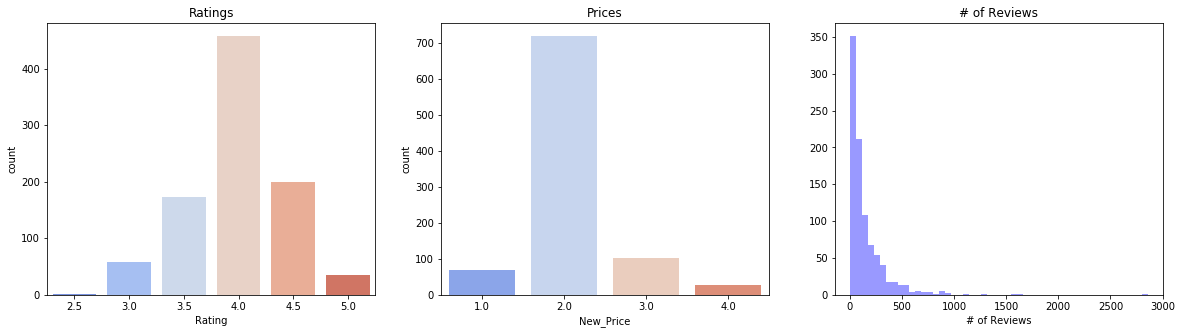

In [91]:
# Distribution plots of Rating, Price and # of Reviews
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='Rating',data=df1,ax=axes[0], palette='coolwarm').set_title('Ratings')
sns.countplot(x='New_Price',data=df1, ax=axes[1], palette='coolwarm').set_title('Prices')
sns.distplot(df1['# of Reviews'],ax=axes[2], color = 'blue', kde = False).set_title('# of Reviews')

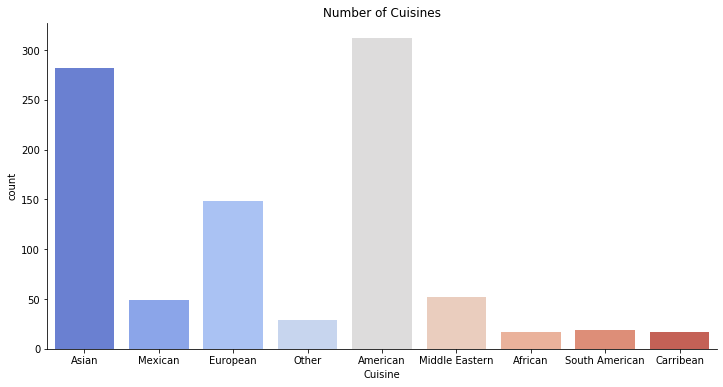

In [197]:
# The number of cuisines in the dataset
plt.figure(figsize=(12,6))
sns.countplot(x='Cuisine',data=df1, palette='coolwarm').set_title('Number of Cuisines')
sns.despine()

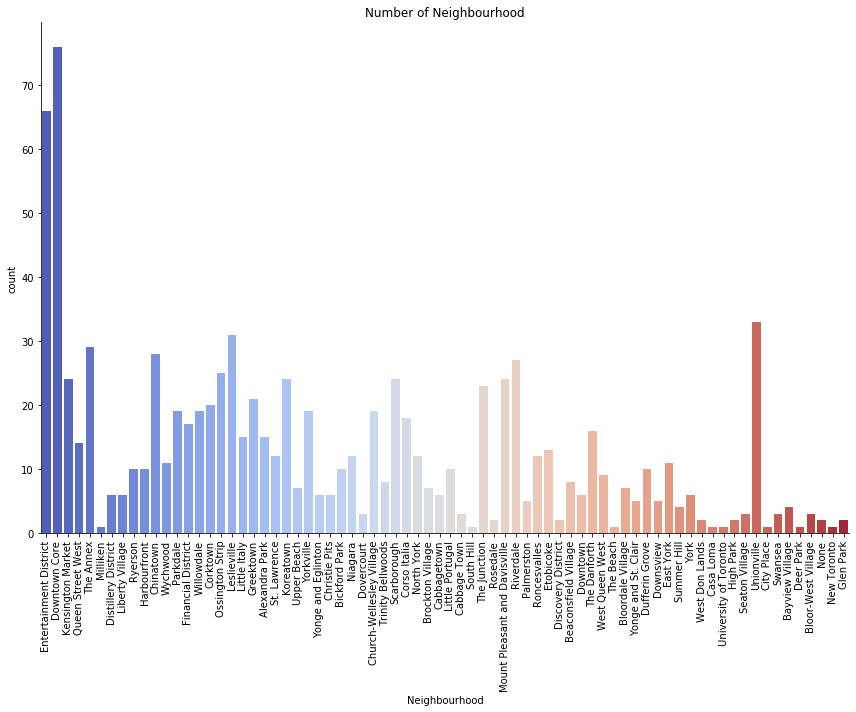

In [198]:
# Number of neighbourhoods in the dataset
plt.figure(figsize=(12,10))
sns.countplot(x='Neighbourhood',data=df1, palette='coolwarm').set_title('Number of Neighbourhood')
plt.xticks(rotation=90)
plt.tight_layout()
sns.despine()

,Price
Cuisine,
European,2.006757
American,1.830128
African,1.647059
Other,1.586207
Asian,1.563830
Mexican,1.408163
South American,1.368421
Middle Eastern,1.326923
Carribean,1.235294


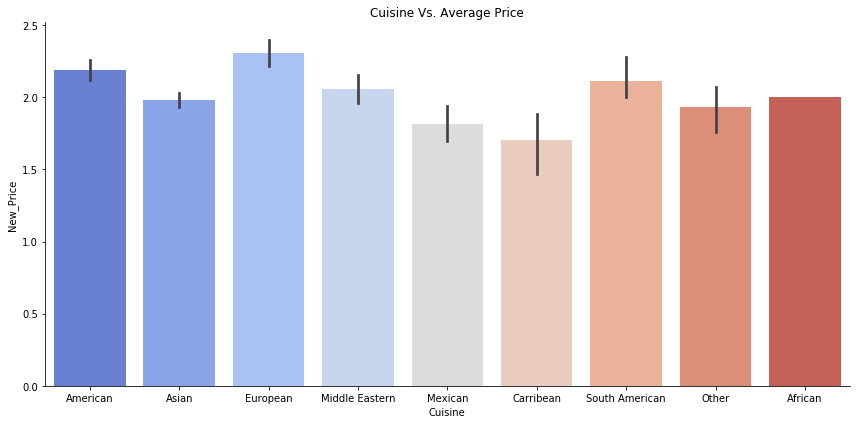

In [92]:
# Cuisine Vs. Average Price
pt = pd.pivot_table(df1, index='Cuisine',values='Price').sort_values(by='Price',ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Cuisine',y='New_Price',data=df1,palette='coolwarm').set_title('Cuisine Vs. Average Price')
plt.tight_layout()
sns.despine()
pt

,Price
Neighbourhood,
South Hill,4.000000
Casa Loma,4.000000
Milliken,3.000000
Rosedale,3.000000
Yorkville,2.578947
Financial District,2.529412
Distillery District,2.500000


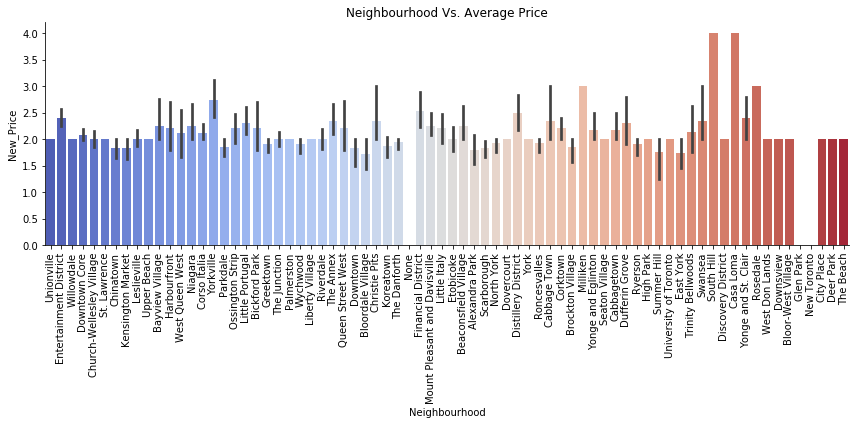

In [93]:
# Neighbourhood Vs. Average Price
pt = pd.pivot_table(df1, index='Neighbourhood',values='Price').sort_values(by='Price',ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Neighbourhood',y='New_Price',data=df1,palette='coolwarm').set_title('Neighbourhood Vs. Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
sns.despine()
pt.head(7)

,# of Reviews
Cuisine,
American,312
Asian,282
European,148
Middle Eastern,52
Mexican,49
Other,29
South American,19
African,17
Carribean,17


<Figure size 864x432 with 0 Axes>

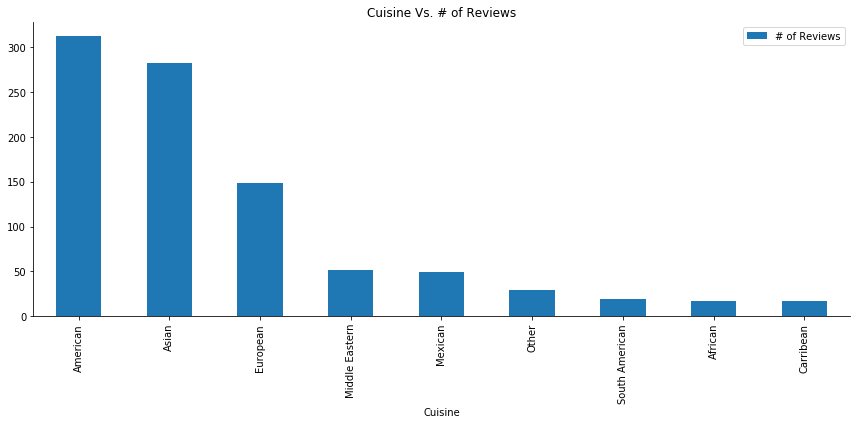

In [158]:
# Cuisine Vs. Reviews
pt = pd.pivot_table(df1, index='Cuisine',values='# of Reviews',aggfunc='count').sort_values(by='# of Reviews',ascending=False)
plt.figure(figsize=(12,6))
pt.plot(kind='bar',title='Cuisine Vs. # of Reviews',figsize=(12,6))
plt.tight_layout()
sns.despine()
pt

,# of Reviews
Neighbourhood,
Downtown Core,76
Entertainment District,66
Unionville,33
Leslieville,31
The Annex,29
Chinatown,28
Riverdale,27


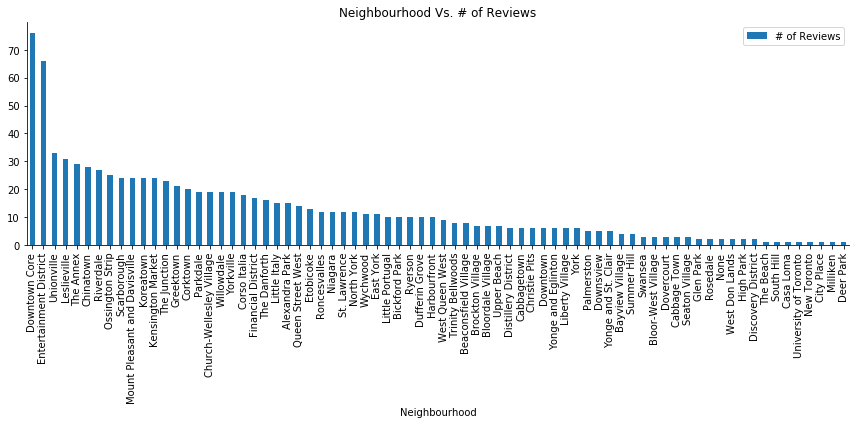

In [156]:
# Neighbourhood Vs. Reviews
pt = pd.pivot_table(df1, index='Neighbourhood',values='# of Reviews', aggfunc='count').sort_values(by='# of Reviews',ascending=False)
pt.plot(kind='bar',figsize=(12,6),title='Neighbourhood Vs. # of Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
sns.despine()
pt.head(7)

In [196]:
# Number of Cuisines in Respective Neighbourhoods
df2 = df1[['Cuisine','Neighbourhood',]]
df2.head()

In [127]:
df2['Cuisine'].unique()

array(['Asian', 'Mexican', 'European', 'Other', 'American',
       'Middle Eastern', 'African', 'South American', 'Carribean'],
      dtype=object)

In [128]:
# Dictionary for mapping each distinct cuisine type
cuisine_dict = {'Asian':1,'Mexican':2,'European':3,'American':4,'Middle Eastern':5,
                'African':6,'South American':7,'Carribean':8,'Other':9}
df2['Cuisine_num'] = df2['Cuisine'].map(cuisine_dict)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [185]:
# Pivot table of number of cuisines in respective neighbourhoods
pt = pd.pivot_table(df2,index=['Neighbourhood','Cuisine'],values='Cuisine_num',aggfunc='count')
pt

Cuisine_num
Neighbourhood   Cuisine               
Alexandra Park  American             6
                Asian                5
                Carribean            1
                European             3
Bayview Village Asian                2
...                                ...
York            European             3
                Other                1
Yorkville       American             9
                Asian                1
                European             9

[270 rows x 1 columns]

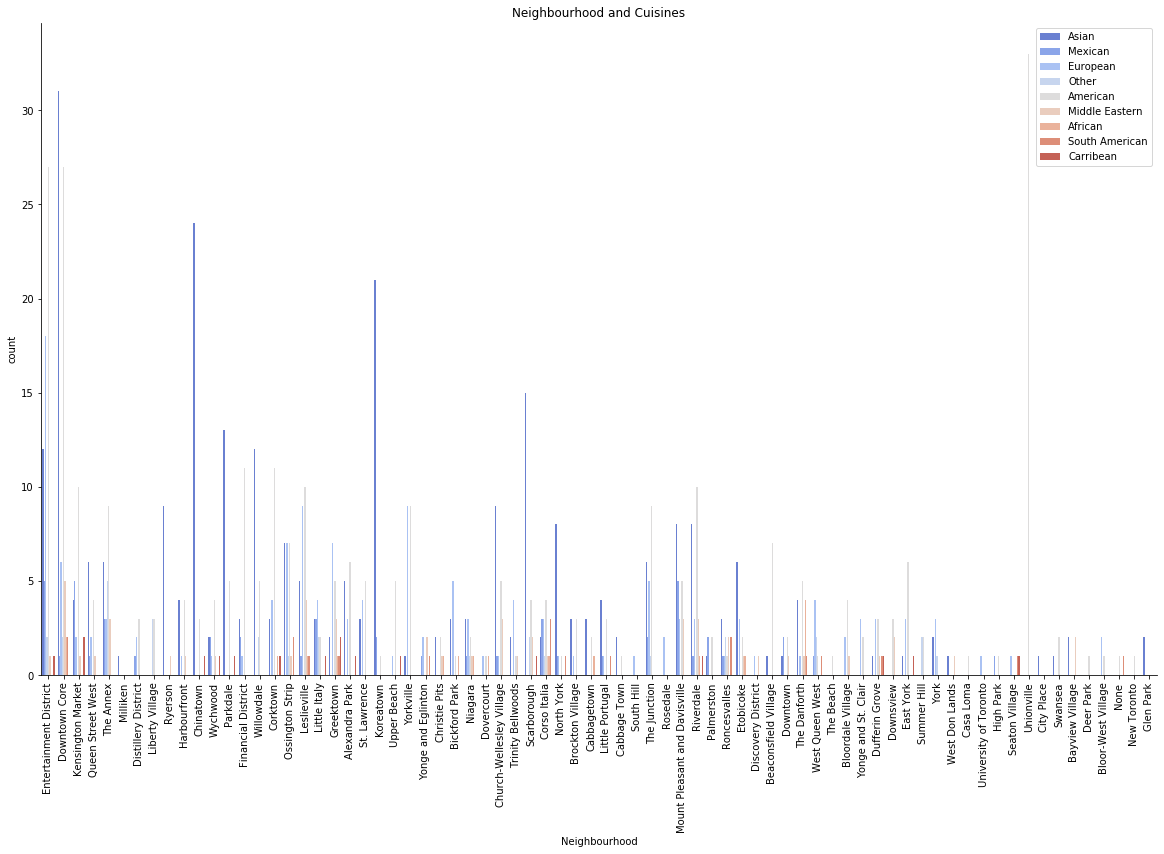

In [195]:
# Plot of each cuisine in the respective neighbourhood
plt.figure(figsize=(20,12))
sns.countplot(x='Neighbourhood',data=df3,hue='Cuisine', palette='coolwarm').set_title('Neighbourhood and Cuisines')
plt.xticks(rotation=90)
plt.tight_layout
sns.despine()
plt.legend(loc='upper right')

In [93]:
# Correlation with Price
df1.corr()['Price']

# of Reviews    0.310980
Rating         -0.290179
Price           1.000000
Name: Price, dtype: float64

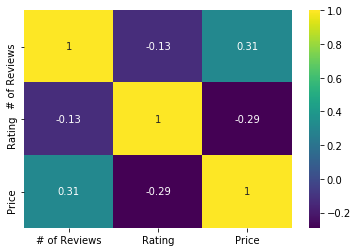

In [99]:
# Heatmap Correlation
sns.heatmap(df1.corr(),annot = True, cmap='viridis')

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default ba

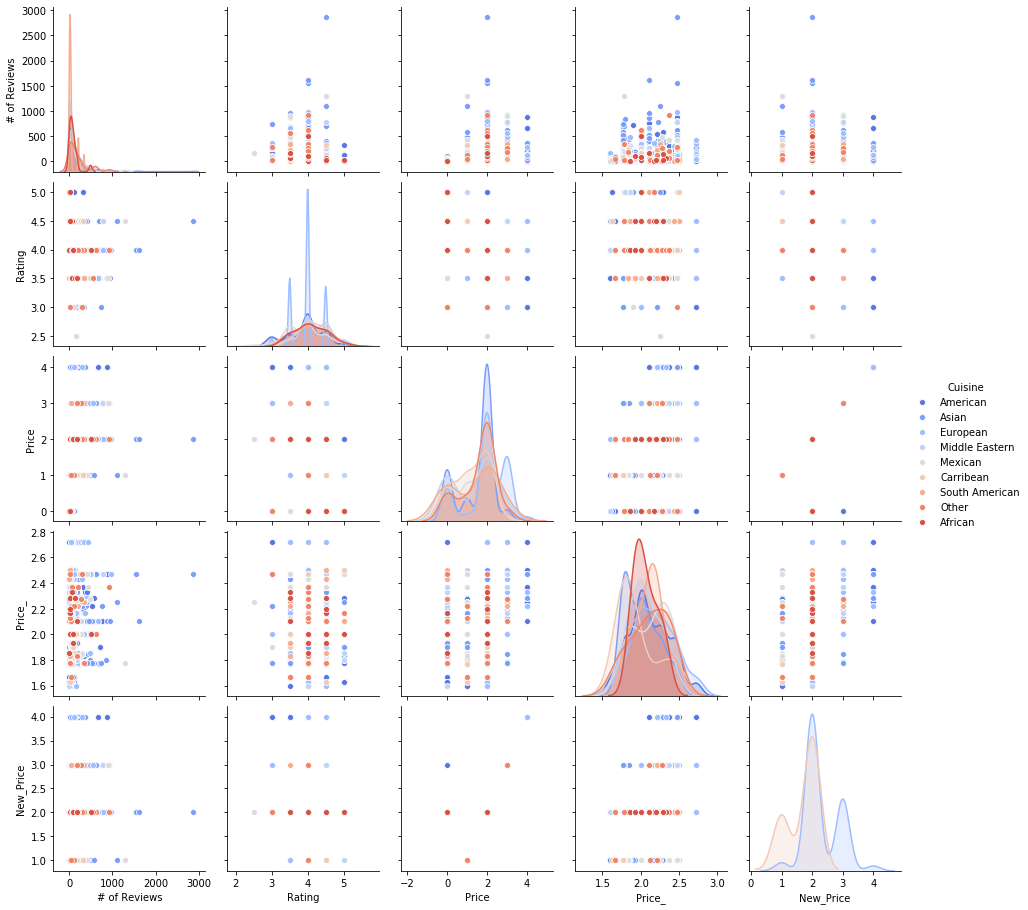

In [94]:
sns.pairplot(df1, palette='coolwarm', hue='Cuisine')